<a href="https://colab.research.google.com/github/Naiml007/.env1/blob/main/AnimeCONV%26dlColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

===========================================================================

                                                                  **ANIME DOWNLOADER**
build with

---



1.   https://chatgpt.com/share/7bbbb6db-b9e2-4e9d-96df-3eb77e0868a8
2.   https://github.com/consumet/api.consumet.org




===========================================================================

search anime

In [ ]:
# Install necessary library
!pip install requests

# Import necessary library
import requests

# Function to search for an anime on GogoAnime
def search_anime(query, page=1):
    url = f"https://3dapixonsumet.vercel.app/anime/gogoanime/{query}"
    response = requests.get(url, params={"page": page})

    # Debugging: Print the response status code and content
    print("Response Status Code:", response.status_code)
    print("Response Content:", response.content.decode('utf-8'))  # Decode to print as string

    # Parse the JSON response
    data = response.json()

    # Debugging: Print the parsed JSON data
    print("Parsed JSON Data:", data)

    return data

# User input for search query
query = input("Enter the anime title to search: ")

# User input for page number (optional, defaults to 1)
page = input("Enter the page number of results to return (default is 1): ")
page = int(page) if page else 1

# Fetch the search results
search_results = search_anime(query, page)

# Print the search results as JSON
import json
print(json.dumps(search_results, indent=2))


anime info

In [12]:
# Install necessary library if not already installed
!pip install requests

# Import necessary libraries
import requests
import json

# Function to get anime info from GogoAnime
def get_anime_info(anime_id):
    if not anime_id:
        print("Error: Anime ID is required.")
        return None

    url = f"https://3dapixonsumet.vercel.app/anime/gogoanime/info/{anime_id}"
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raises an HTTPError if the HTTP request returned an unsuccessful status code.

        # Debugging: Print the response status code and content
        print("Response Status Code:", response.status_code)
        print("Response Content:", response.content.decode('utf-8'))  # Decode to print as string

        # Parse the JSON response
        data = response.json()

        # Debugging: Print the parsed JSON data
        print("Parsed JSON Data:", data)

        return data
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return None

# User input for anime ID
anime_id = input("Enter the anime ID (e.g., spy-x-family): ").strip()

# Fetch the anime info
anime_info = get_anime_info(anime_id)

# Print the anime info as JSON if fetched successfully
if anime_info:
    print(json.dumps(anime_info, indent=2))
else:
    print("Failed to fetch the anime info.")


Enter the anime ID (e.g., spy-x-family): naruto
Response Status Code: 200
Response Content: {"id":"naruto","title":"Naruto","url":"https://anitaku.so/category/naruto","genres":["Action","Comedy","Martial Arts","Shounen","Super Power"],"totalEpisodes":220,"image":"https://gogocdn.net/images/anime/N/naruto.jpg","releaseDate":"2002","description":"In a world of mystical and powerful enemies lurk in every nation, a legendary Nine-Tailed Demon Fox attacked the ninja village Konoha, killing many innocent people. In response of a desperate measure from the people, the leader of the village – the Fourth Hokage – sacrificed his life to defeat the demon fox. By sacrificing his own life, he sealed the demon fox into a very young boy named, Naruto Uzumaki. Naruto has lost his parents during the attack. He grew up in the village and was mistreated badly by everyone in town.\n\nWith his loud mouth and careless attitude, he is determined to become the greatest ninja, hokage, in his village. Along wit

input anime name from previous output. save anime in drive, **how to input name** take the name id from anime **search** output example  ``naruto-episode-38``
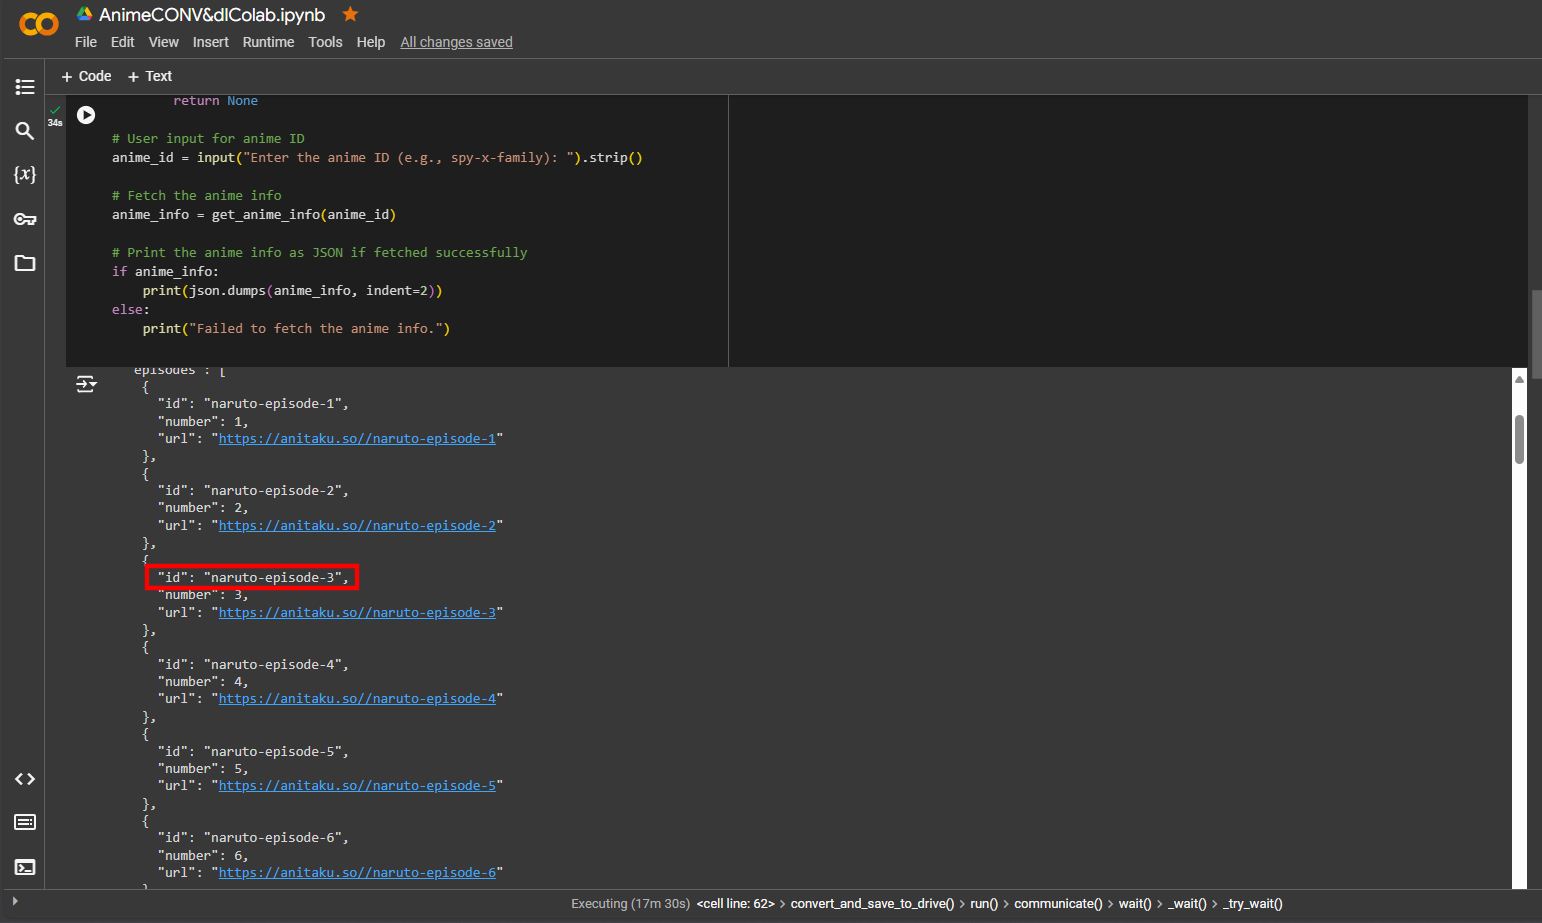

+ Faster

In [ ]:
# Install necessary libraries
!pip install requests
!pip install ffmpeg-python
!pip install tqdm

# Import necessary libraries
import requests
import ffmpeg
from tqdm import tqdm
from google.colab import drive
import threading

# Mount Google Drive
drive.mount('/content/drive')

# Function to fetch anime episode streaming links
def fetch_anime_episode(episodeId):
    url = f"https://3dapixonsumet.vercel.app/anime/gogoanime/watch/{episodeId}"
    response = requests.get(url, params={"server": "gogocdn"})

    # Debugging: Print the response status code and content
    print("Response Status Code:", response.status_code)
    print("Response Content:", response.content.decode('utf-8'))  # Decode to print as string

    # Parse the JSON response
    data = response.json()

    # Debugging: Print the parsed JSON data
    print("Parsed JSON Data:", data)

    # Extract m3u8 URLs and their quality options from the response
    sources = []
    if 'sources' in data and data['sources']:
        for source in data['sources']:
            if source['isM3U8']:
                sources.append({"url": source['url'], "quality": source['quality']})

    return sources

# Function to convert m3u8 to mp4 and save to Google Drive
def convert_and_save_to_drive(m3u8_url, output_path):
    try:
        input_stream = ffmpeg.input(m3u8_url)
        output_stream = ffmpeg.output(input_stream, output_path)
        ffmpeg.run(output_stream, overwrite_output=True)
        print(f"Video saved to: {output_path}")
    except ffmpeg.Error as e:
        print("Error occurred during conversion:", e)
        print("ffmpeg stderr output:", e.stderr.decode('utf-8'))

# User input for episodeId
episodeId = input("Enter the episode ID (e.g., spy-x-family-episode-1): ")

# Fetch the m3u8 URLs and their quality options
sources = fetch_anime_episode(episodeId)
if sources:
    # Print available quality options
    print("Available quality options:")
    for idx, source in enumerate(sources):
        print(f"{idx + 1}: {source['quality']}")

    # User input for quality choice
    choice = int(input("Enter the number for the desired quality: ")) - 1
    if 0 <= choice < len(sources):
        m3u8_url = sources[choice]['url']
        print(f"Selected m3u8 URL: {m3u8_url}")

        # Define the output path in Google Drive
        output_path = f"/content/drive/My Drive/{episodeId}_{sources[choice]['quality']}.mp4"

        # Convert and save the video in a separate thread
        conversion_thread = threading.Thread(target=convert_and_save_to_drive, args=(m3u8_url, output_path))
        conversion_thread.start()
        conversion_thread.join()  # Wait for the conversion to complete
    else:
        print("Invalid choice.")
else:
    print("Failed to fetch the m3u8 URLs.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Enter the episode ID (e.g., spy-x-family-episode-1): naruto-episode-4
Response Status Code: 200
Response Content: {"headers":{"Referer":"https://s3taku.com/streaming.php?id=MjUwNTk=&title=Naruto+Episode+4"},"sources":[{"url":"https://www089.vipanicdn.net/streamhls/027e9529af2b06fe7b4f47e507a787eb/ep.4.1703928645.360.m3u8","isM3U8":true,"quality":"360p"},{"url":"https://www089.vipanicdn.net/streamhls/027e9529af2b06fe7b4f47e507a787eb/ep.4.1703928645.480.m3u8","isM3U8":true,"quality":"480p"},{"url":"https://www089.vipanicdn.net/streamhls/027e9529af2b06fe7b4f47e507a787eb/ep.4.1703928645.720.m3u8","isM3U8":true,"quality":"720p"},{"url":"https://www089.vipanicdn.net/streamhls/027e9529af2b06fe7b4f47e507a787eb/ep.4.1703928645.1080.m3u8","isM3U8":true,"quality":"1080p"},{"url":"https://www089.vipanicdn.net/streamhls/027e9529af2b06fe7b4f47e507a787eb/ep.4.1703928645.m3u

animated save to drive  
+ slow

In [14]:
# Install necessary libraries
!pip install requests
!pip install ffmpeg-python
!pip install tqdm

# Import necessary libraries
import requests
import ffmpeg
from tqdm import tqdm
from google.colab import drive
import time

# Mount Google Drive
drive.mount('/content/drive')

# Function to fetch anime episode streaming link
def fetch_anime_episode(episodeId):
    url = f"https://3dapixonsumet.vercel.app/anime/gogoanime/watch/{episodeId}"
    response = requests.get(url, params={"server": "gogocdn"})

    # Debugging: Print the response status code and content
    print("Response Status Code:", response.status_code)
    print("Response Content:", response.content.decode('utf-8'))  # Decode to print as string

    # Parse the JSON response
    data = response.json()

    # Debugging: Print the parsed JSON data
    print("Parsed JSON Data:", data)

    # Extract the m3u8 URL from the response for quality '1080p' or '720p'
    if 'sources' in data and data['sources']:
        for source in data['sources']:
            if source['isM3U8'] and source['quality'] in ['1080p', '720p']:
                return source['url']
    return None

# Function to convert m3u8 to mp4 and save to Google Drive
def convert_and_save_to_drive(m3u8_url, output_path):
    try:
        input_stream = ffmpeg.input(m3u8_url)
        output_stream = ffmpeg.output(input_stream, output_path)

        # Use a progress bar to simulate the conversion process
        with tqdm(total=100, desc="Converting to MP4", ncols=100) as pbar:
            # Run the ffmpeg process with a callback to update the progress bar
            ffmpeg.run(output_stream, overwrite_output=True)
            for _ in range(100):
                time.sleep(0.05)  # Simulate progress
                pbar.update(1)

        print(f"Video saved to: {output_path}")
    except ffmpeg.Error as e:
        print("Error occurred during conversion:", e)
        print("ffmpeg stderr output:", e.stderr.decode('utf-8'))

# User input for episodeId
episodeId = input("Enter the episode ID (e.g., spy-x-family-episode-1): ")

# Fetch the m3u8 URL
m3u8_url = fetch_anime_episode(episodeId)
if m3u8_url:
    print(f"m3u8 URL: {m3u8_url}")

    # Define the output path in Google Drive
    output_path = f"/content/drive/My Drive/{episodeId}.mp4"

    # Convert and save the video
    convert_and_save_to_drive(m3u8_url, output_path)
else:
    print("Failed to fetch the m3u8 URL.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Enter the episode ID (e.g., spy-x-family-episode-1): naruto-episode-38
Response Status Code: 200
Response Content: {"headers":{"Referer":"https://s3taku.com/streaming.php?id=MjUxODU=&title=Naruto+Episode+38"},"sources":[{"url":"https://www045.vipanicdn.net/streamhls/027e9529af2b06fe7b4f47e507a787eb/ep.38.1709241812.360.m3u8","isM3U8":true,"quality":"360p"},{"url":"https://www045.vipanicdn.net/streamhls/027e9529af2b06fe7b4f47e507a787eb/ep.38.1709241812.480.m3u8","isM3U8":true,"quality":"480p"},{"url":"https://www045.vipanicdn.net/streamhls/027e9529af2b06fe7b4f47e507a787eb/ep.38.1709241812.720.m3u8","isM3U8":true,"quality":"720p"},{"url":"https://www045.vipanicdn.net/streamhls/027e9529af2b06fe7b4f47e507a787eb/ep.38.1709241812.1080.m3u8","isM3U8":true,"quality":"1080p"},{"url":"https://www045.vipanicdn.net/streamhls/027e9529af2b06fe7b4f47e507a787eb/ep.38.1709241

Converting to MP4: 100%|██████████████████████████████████████████| 100/100 [20:18<00:00, 12.18s/it]

Video saved to: /content/drive/My Drive/naruto-episode-38.mp4


new dl test
+ quality selector
+ slow

In [1]:
# Install necessary libraries
!pip install requests
!pip install ffmpeg-python
!pip install tqdm

# Import necessary libraries
import requests
import ffmpeg
from tqdm import tqdm
from google.colab import drive
import time

# Mount Google Drive
drive.mount('/content/drive')

# Function to fetch anime episode streaming links
def fetch_anime_episode(episodeId):
    url = f"https://3dapixonsumet.vercel.app/anime/gogoanime/watch/{episodeId}"
    response = requests.get(url, params={"server": "gogocdn"})

    # Debugging: Print the response status code and content
    print("Response Status Code:", response.status_code)
    print("Response Content:", response.content.decode('utf-8'))  # Decode to print as string

    # Parse the JSON response
    data = response.json()

    # Debugging: Print the parsed JSON data
    print("Parsed JSON Data:", data)

    # Extract m3u8 URLs and their quality options from the response
    sources = []
    if 'sources' in data and data['sources']:
        for source in data['sources']:
            if source['isM3U8']:
                sources.append({"url": source['url'], "quality": source['quality']})

    return sources

# Function to convert m3u8 to mp4 and save to Google Drive
def convert_and_save_to_drive(m3u8_url, output_path):
    try:
        input_stream = ffmpeg.input(m3u8_url)
        output_stream = ffmpeg.output(input_stream, output_path)

        # Use a progress bar to simulate the conversion process
        with tqdm(total=100, desc="Converting to MP4", ncols=100) as pbar:
            # Run the ffmpeg process with a callback to update the progress bar
            ffmpeg.run(output_stream, overwrite_output=True)
            for _ in range(100):
                time.sleep(0.05)  # Simulate progress
                pbar.update(1)

        print(f"Video saved to: {output_path}")
    except ffmpeg.Error as e:
        print("Error occurred during conversion:", e)
        print("ffmpeg stderr output:", e.stderr.decode('utf-8'))

# User input for episodeId
episodeId = input("Enter the episode ID (e.g., spy-x-family-episode-1): ")

# Fetch the m3u8 URLs and their quality options
sources = fetch_anime_episode(episodeId)
if sources:
    # Print available quality options
    print("Available quality options:")
    for idx, source in enumerate(sources):
        print(f"{idx + 1}: {source['quality']}")

    # User input for quality choice
    choice = int(input("Enter the number for the desired quality: ")) - 1
    if 0 <= choice < len(sources):
        m3u8_url = sources[choice]['url']
        print(f"Selected m3u8 URL: {m3u8_url}")

        # Define the output path in Google Drive
        output_path = f"/content/drive/My Drive/{episodeId}_{sources[choice]['quality']}.mp4"

        # Convert and save the video
        convert_and_save_to_drive(m3u8_url, output_path)
    else:
        print("Invalid choice.")
else:
    print("Failed to fetch the m3u8 URLs.")


Mounted at /content/drive
Enter the episode ID (e.g., spy-x-family-episode-1): naruto-episode-23
Response Status Code: 200
Response Content: {"headers":{"Referer":"https://s3taku.com/streaming.php?id=MjUxMjU=&title=Naruto+Episode+23"},"sources":[{"url":"https://www041.vipanicdn.net/streamhls/027e9529af2b06fe7b4f47e507a787eb/ep.23.1709241848.360.m3u8","isM3U8":true,"quality":"360p"},{"url":"https://www041.vipanicdn.net/streamhls/027e9529af2b06fe7b4f47e507a787eb/ep.23.1709241848.480.m3u8","isM3U8":true,"quality":"480p"},{"url":"https://www041.vipanicdn.net/streamhls/027e9529af2b06fe7b4f47e507a787eb/ep.23.1709241848.720.m3u8","isM3U8":true,"quality":"720p"},{"url":"https://www041.vipanicdn.net/streamhls/027e9529af2b06fe7b4f47e507a787eb/ep.23.1709241848.1080.m3u8","isM3U8":true,"quality":"1080p"},{"url":"https://www041.vipanicdn.net/streamhls/027e9529af2b06fe7b4f47e507a787eb/ep.23.1709241848.m3u8","isM3U8":true,"quality":"default"},{"url":"https://www041.anicdnstream.info/videos/hls/t0uGmS

Converting to MP4: 100%|██████████████████████████████████████████| 100/100 [12:00<00:00,  7.21s/it]

Video saved to: /content/drive/My Drive/naruto-episode-23_480p.mp4


old code


In [ ]:
# Install necessary libraries
!pip install requests
!pip install ffmpeg-python

# Import necessary libraries
import requests
import ffmpeg
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Function to fetch anime episode streaming link
def fetch_anime_episode(episodeId):
    url = f"https://3dapixonsumet.vercel.app/anime/gogoanime/watch/{episodeId}"
    response = requests.get(url, params={"server": "gogocdn"})

    # Debugging: Print the response status code and content
    print("Response Status Code:", response.status_code)
    print("Response Content:", response.content.decode('utf-8'))  # Decode to print as string

    # Parse the JSON response
    data = response.json()

    # Debugging: Print the parsed JSON data
    print("Parsed JSON Data:", data)

    # Extract the m3u8 URL from the response for quality '1080p' or '720p'
    if 'sources' in data and data['sources']:
        for source in data['sources']:
            if source['isM3U8'] and source['quality'] in ['1080p', '720p']:
                return source['url']
    return None

# Function to convert m3u8 to mp4 and save to Google Drive
def convert_and_save_to_drive(m3u8_url, output_path):
    try:
        input_stream = ffmpeg.input(m3u8_url)
        ffmpeg.output(input_stream, output_path).run(overwrite_output=True)
    except ffmpeg.Error as e:
        print("Error occurred during conversion:", e)
        print("ffmpeg stderr output:", e.stderr.decode('utf-8'))

# User input for episodeId
episodeId = input("Enter the episode ID (e.g., spy-x-family-episode-1): ")

# Fetch the m3u8 URL
m3u8_url = fetch_anime_episode(episodeId)
if m3u8_url:
    print(f"m3u8 URL: {m3u8_url}")

    # Define the output path in Google Drive
    output_path = f"/content/drive/My Drive/{episodeId}.mp4"

    # Convert and save the video
    convert_and_save_to_drive(m3u8_url, output_path)
    print(f"Video saved to: {output_path}")
else:
    print("Failed to fetch the m3u8 URL.")
